In [1]:
import sqlite3
from sqlite3 import Error

from LazyLuna.Tables import Table
from LazyLuna.Views import *
from LazyLuna.loading_functions import *
from LazyLuna.Mini_LL import Case

In [2]:
dbpath = os.path.join('/Users/thomas/Desktop/LL_Database.db')
db_connection = sqlite3.connect(dbpath)

In [3]:
tabname = 'Fullstack_JaTo'

In [4]:
q = 'SELECT casename, Cases.readername, age, gender, weight, height, creation_date, Cases.study_uid, casepath FROM Cases INNER JOIN Case_to_Tab ON (Cases.study_uid=Case_to_Tab.study_uid AND Cases.readername=Case_to_Tab.readername AND Case_to_Tab.tab="' + tabname + '");'
rows = db_connection.cursor().execute(q).fetchall()
cases = [pickle.load(open(r[-1], 'rb')) for r in rows]

PosCov_030_
[1, 5, 9] 10


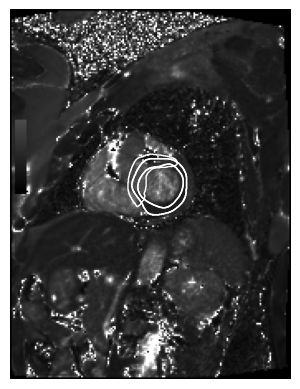

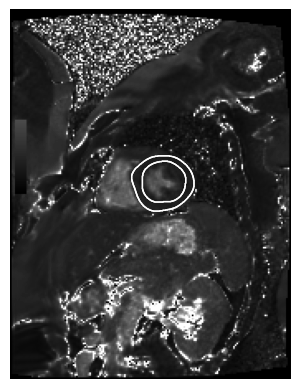

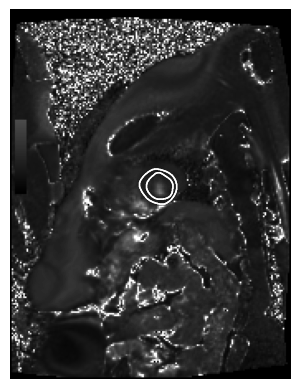

PosCov_028_
[1, 4, 7] 8


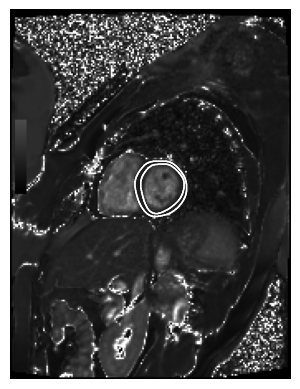

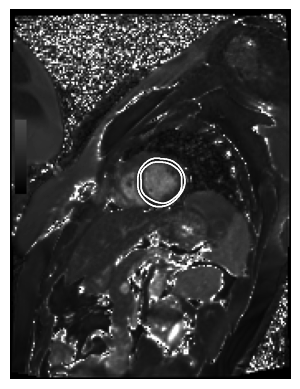

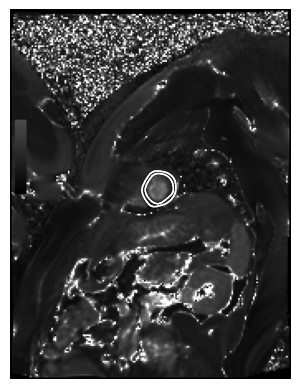

PosCov_022_
[1, 4, 7] 8


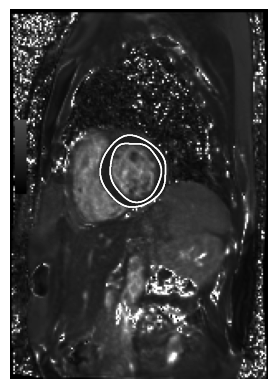

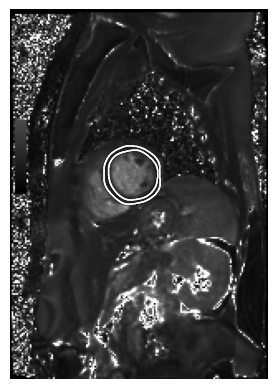

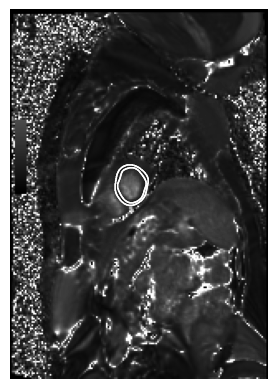

PosCov_026_
[1, 4, 7] 8


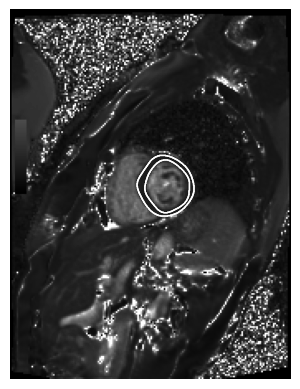

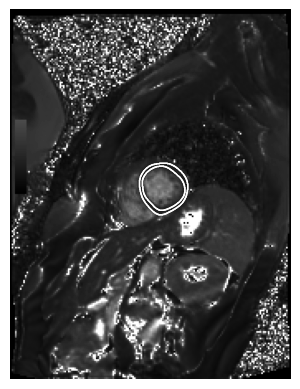

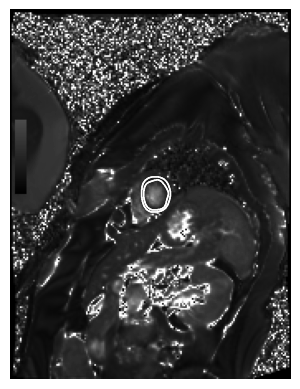

PosCov_010_
[1, 4, 7] 9


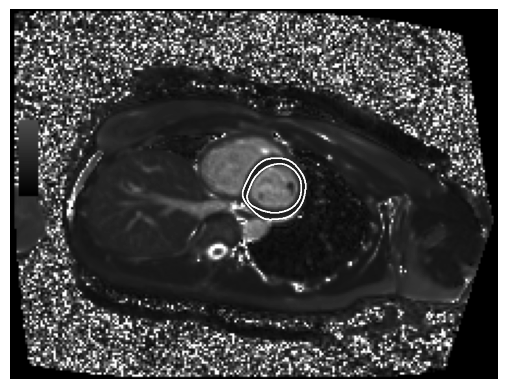

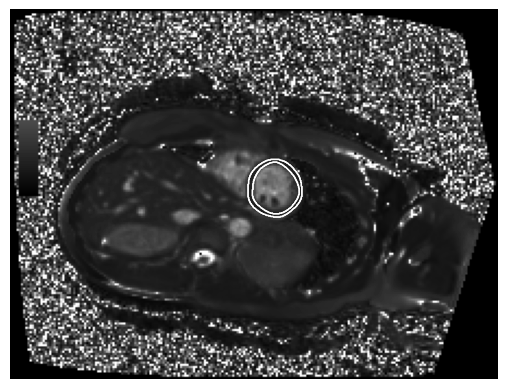

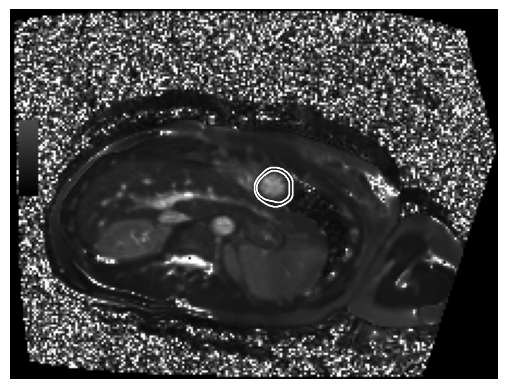

PosCov_024_
[1, 4, 7] 9


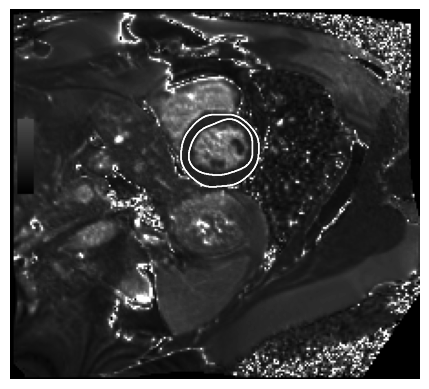

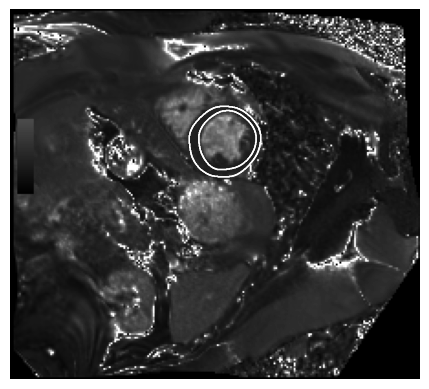

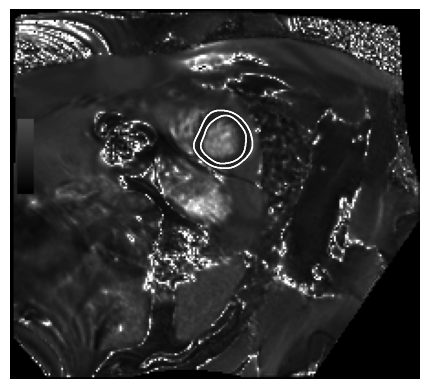

PosCov_027_
[0, 3, 7] 8


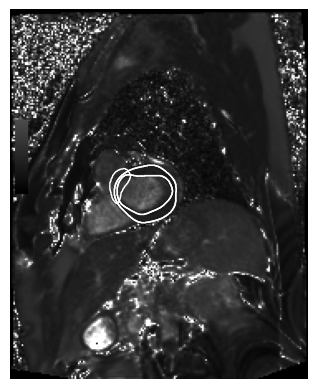

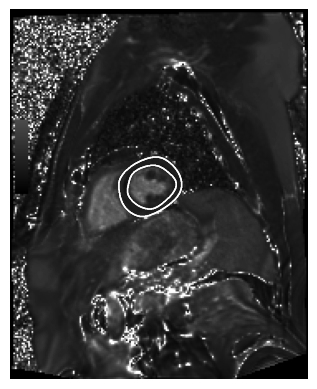

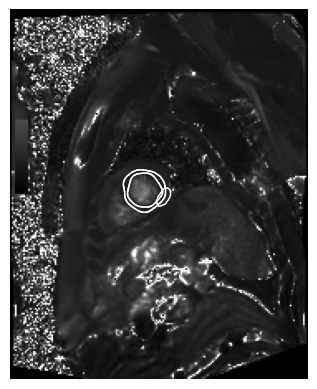

PosCov_029_
[0, 3, 6] 8


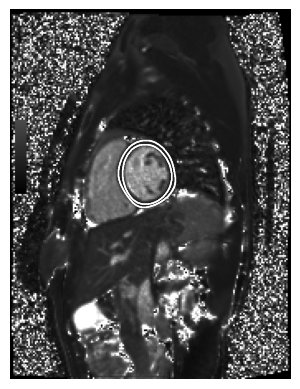

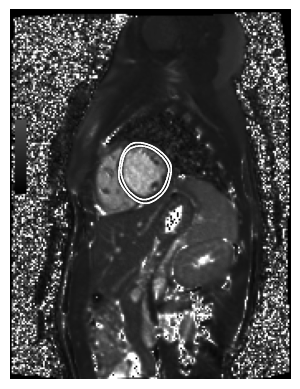

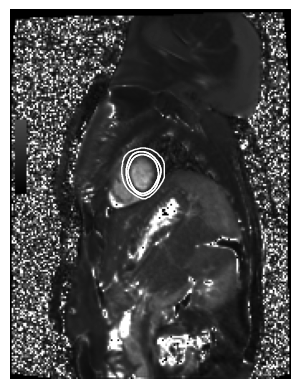

PosCov_006_
[1, 4, 7] 9


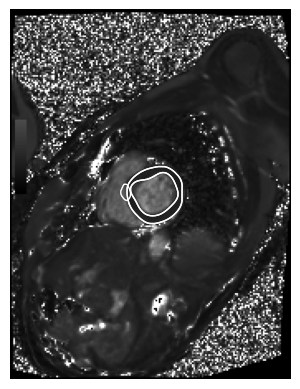

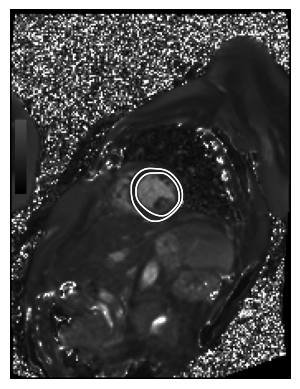

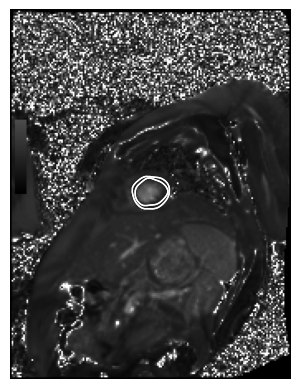

PosCov_031_
[0, 3, 7] 8


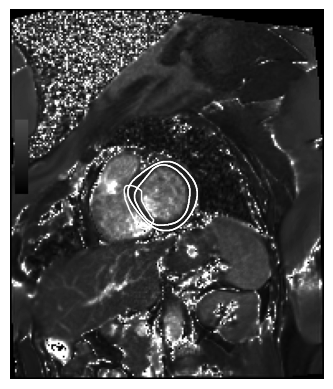

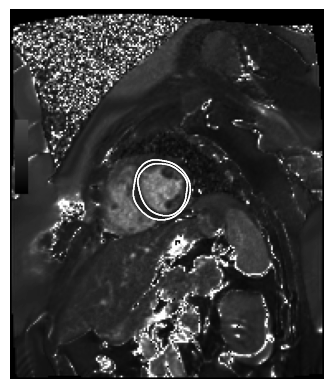

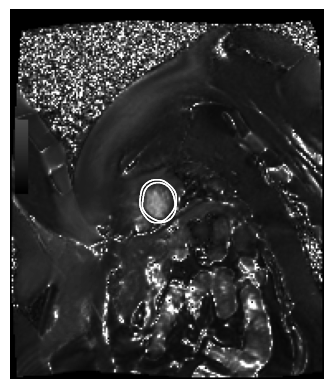

In [14]:
v = SAX_T2_View()
cases = [v.customize_case(c) for c in cases]

for c in cases:
    print(c.case_name)
    cat = c.categories[0]
    distances = cat.get_slice_distances_to_extent_points()
    basal_idx = np.argmin(distances[:,0])
    midv_idx = np.argmin(distances[:,1])
    api_idx = np.argmin(distances[:,2])
    regular_slices = [basal_idx, midv_idx, api_idx]
    print(regular_slices, cat.nr_slices)
    
    for d in regular_slices:
        img  = cat.get_img (d,0)
        anno = cat.get_anno(d,0)
        fig, ax = plt.subplots(1,1)
        ax.imshow(img, cmap='gray')
        anno.plot_all_contour_outlines(ax)
        ax.axis('off')
        plt.show()
    
    